In [13]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [14]:
bulasik_miktari = ctrl.Antecedent(np.arange(0, 11, 1), 'bulasik_miktari')
kirlilik_derecesi = ctrl.Antecedent(np.arange(0, 11, 1), 'kirlilik_derecesi')
bulasik_tipi = ctrl.Antecedent(np.arange(0, 11, 1), 'bulasik_tipi')

yikama_suresi = ctrl.Consequent(np.arange(0, 61, 1), 'yikama_suresi')
su_sicakligi = ctrl.Consequent(np.arange(30, 80, 1), 'su_sicakligi')
deterjan_miktari = ctrl.Consequent(np.arange(0, 101, 1), 'deterjan_miktari')

In [15]:
bulasik_miktari['az'] = fuzz.trimf(bulasik_miktari.universe, [0, 0, 5])
bulasik_miktari['orta'] = fuzz.trimf(bulasik_miktari.universe, [0, 5, 10])
bulasik_miktari['cok'] = fuzz.trimf(bulasik_miktari.universe, [5, 10, 10])

kirlilik_derecesi['dusuk'] = fuzz.trimf(kirlilik_derecesi.universe, [0, 0, 5])
kirlilik_derecesi['orta'] = fuzz.trimf(kirlilik_derecesi.universe, [0, 5, 10])
kirlilik_derecesi['yuksek'] = fuzz.trimf(kirlilik_derecesi.universe, [5, 10, 10])

bulasik_tipi['cam'] = fuzz.trimf(bulasik_tipi.universe, [0, 0, 5])
bulasik_tipi['plastik'] = fuzz.trimf(bulasik_tipi.universe, [0, 5, 10])
bulasik_tipi['metal'] = fuzz.trimf(bulasik_tipi.universe, [5, 10, 10])

yikama_suresi['kisa'] = fuzz.trimf(yikama_suresi.universe, [0, 0, 30])
yikama_suresi['orta'] = fuzz.trimf(yikama_suresi.universe, [20, 30, 50])
yikama_suresi['uzun'] = fuzz.trimf(yikama_suresi.universe, [40, 60, 60])

su_sicakligi['dusuk'] = fuzz.trimf(su_sicakligi.universe, [30, 30, 50])
su_sicakligi['orta'] = fuzz.trimf(su_sicakligi.universe, [40, 55, 70])
su_sicakligi['yuksek'] = fuzz.trimf(su_sicakligi.universe, [60, 80, 80])

deterjan_miktari['az'] = fuzz.trimf(deterjan_miktari.universe, [0, 0, 50])
deterjan_miktari['orta'] = fuzz.trimf(deterjan_miktari.universe, [20, 50, 80])
deterjan_miktari['cok'] = fuzz.trimf(deterjan_miktari.universe, [60, 100, 100])

In [12]:
rule1 = ctrl.Rule(bulasik_miktari['az'] & kirlilik_derecesi['dusuk'], (yikama_suresi['kisa'], su_sicakligi['dusuk'], deterjan_miktari['az']))
rule2 = ctrl.Rule(bulasik_miktari['orta'] & kirlilik_derecesi['orta'], (yikama_suresi['orta'], su_sicakligi['orta'], deterjan_miktari['orta']))
rule3 = ctrl.Rule(bulasik_miktari['cok'] & kirlilik_derecesi['yuksek'], (yikama_suresi['uzun'], su_sicakligi['yuksek'], deterjan_miktari['cok']))

yikama_kontrol = ctrl.ControlSystem([rule1, rule2, rule3])
yikama_simulasyonu = ctrl.ControlSystemSimulation(yikama_kontrol)

In [16]:
yikama_simulasyonu.input['bulasik_miktari'] = 7
yikama_simulasyonu.input['kirlilik_derecesi'] = 6

yikama_simulasyonu.compute()

print(f"Önerilen yıkama süresi: {yikama_simulasyonu.output['yikama_suresi']} dakika")
print(f"Önerilen su sıcaklığı: {yikama_simulasyonu.output['su_sicakligi']} °C")
print(f"Önerilen deterjan miktarı: {yikama_simulasyonu.output['deterjan_miktari']} birim")

Önerilen yıkama süresi: 36.951111111111146 dakika
Önerilen su sıcaklığı: 57.673469387755134 °C
Önerilen deterjan miktarı: 55.93288590604029 birim


/Users/atakanemre/.pyenv/versions/3.11.0/lib/python3.11/site-packages/skfuzzy/control/fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


<Figure size 600x400 with 0 Axes>

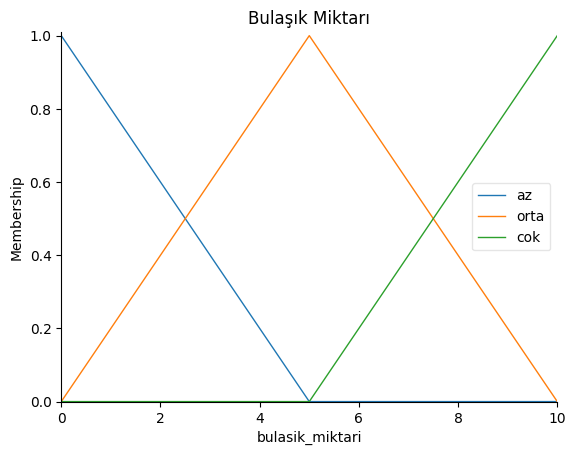

<Figure size 600x400 with 0 Axes>

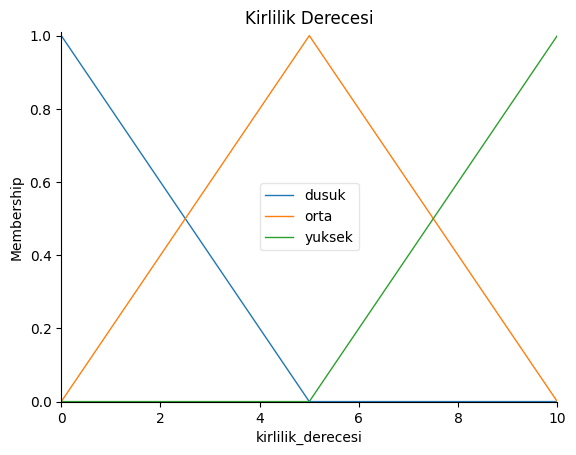

<Figure size 600x400 with 0 Axes>

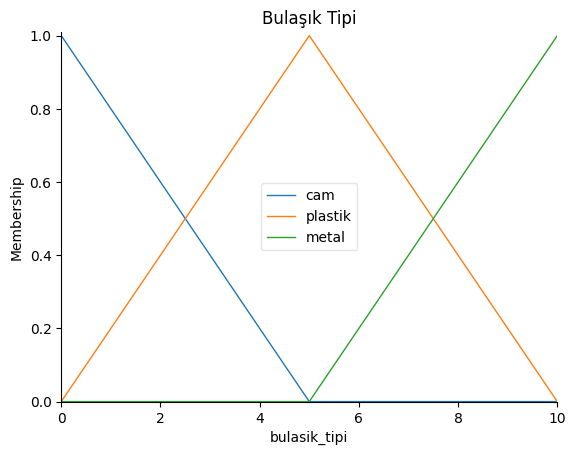

<Figure size 600x400 with 0 Axes>

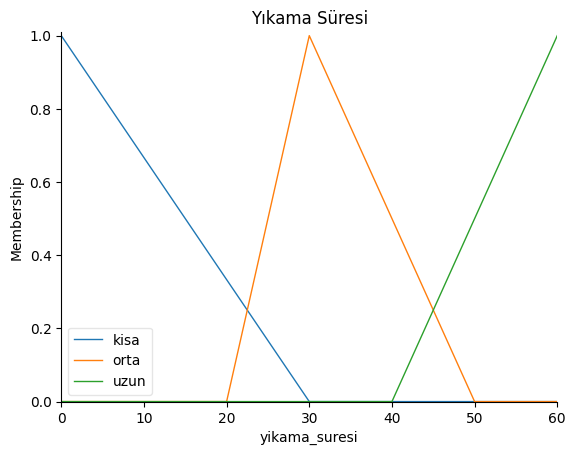

<Figure size 600x400 with 0 Axes>

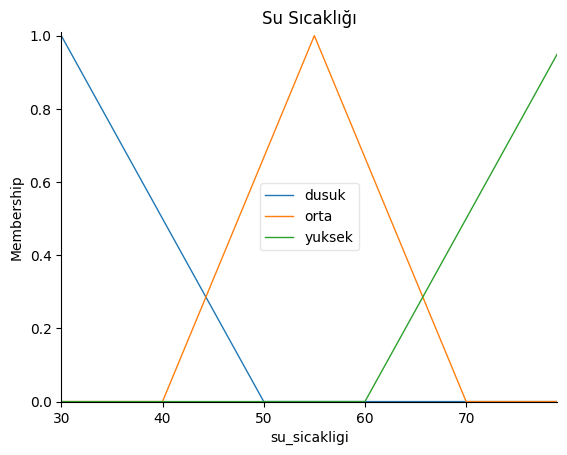

<Figure size 600x400 with 0 Axes>

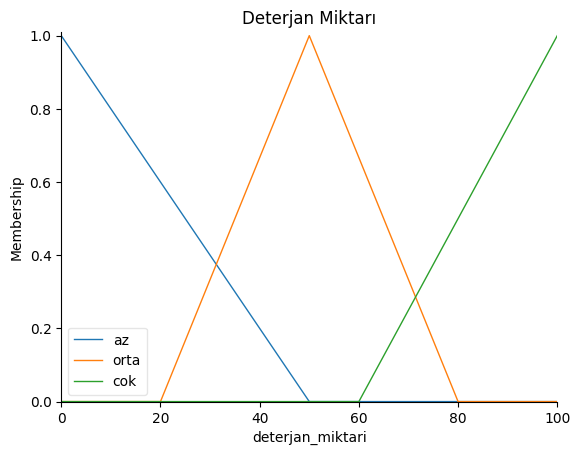

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
bulasik_miktari.view()
plt.title("Bulaşık Miktarı")

plt.figure(figsize=(6, 4))
kirlilik_derecesi.view()
plt.title("Kirlilik Derecesi")

plt.figure(figsize=(6, 4))
bulasik_tipi.view()
plt.title("Bulaşık Tipi")

plt.figure(figsize=(6, 4))
yikama_suresi.view()
plt.title("Yıkama Süresi")

plt.figure(figsize=(6, 4))
su_sicakligi.view()
plt.title("Su Sıcaklığı")

plt.figure(figsize=(6, 4))
deterjan_miktari.view()
plt.title("Deterjan Miktarı")

plt.show()

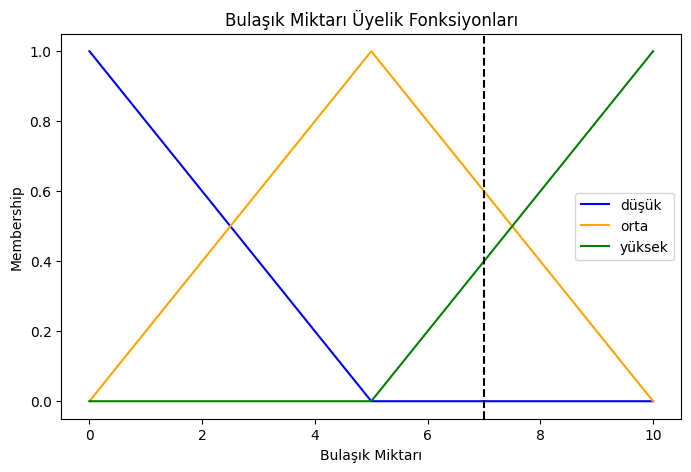

In [18]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

bulasik_miktari = np.arange(0, 11, 1)

dusuk = fuzz.trimf(bulasik_miktari, [0, 0, 5])
orta = fuzz.trimf(bulasik_miktari, [0, 5, 10])
yuksek = fuzz.trimf(bulasik_miktari, [5, 10, 10])

plt.figure(figsize=(8, 5))
plt.plot(bulasik_miktari, dusuk, 'b', linewidth=1.5, label='düşük')
plt.plot(bulasik_miktari, orta, 'orange', linewidth=1.5, label='orta')
plt.plot(bulasik_miktari, yuksek, 'g', linewidth=1.5, label='yüksek')

test_bulasik_miktari = 7
plt.axvline(x=test_bulasik_miktari, color='k', linestyle='--', linewidth=1.5)

plt.title("Bulaşık Miktarı Üyelik Fonksiyonları")
plt.xlabel("Bulaşık Miktarı")
plt.ylabel("Membership")
plt.legend()
plt.show()

